# Analisis de la Evolucion de la Calidad de los Datos
## Información proveniente del Portal de Datos Abiertos del Estado Colombiano

**Integrantes**

- Claudia Viviana Arévalo Bernal
- Sergio Daniel Hernández Charpak
- Hugo Sin Triana

#### Librerias

In [40]:
import pandas as pd
import pandas_profiling
import numpy as np
import datetime
import urllib
from bokeh.plotting import *
from bokeh.models import HoverTool
from collections import OrderedDict
import platform
import ntpath
import os
import re

#### Localizacion

In [11]:
donde_estoy = %pwd

In [12]:
%cd $donde_estoy

/home/laptop/Documentos/LSST/CAD/Entrega_3


#### Lectura de los datos

In [13]:
plataforma_operativa = platform.system()
if(plataforma_operativa=='Windows'):
    carpeta_datos = "PDA"
    archivo_datos = carpeta_datos + r"\10_-_SECOP_I_-_2011_2014.csv"
    secop = pd.read_csv(archivo_datos, encoding='utf-8')
    archivo_datos_limpio = carpeta_datos + r"\10_-_SECOP_I_-_2011_2014_v5.csv"
    perfilamiento_datos_limpios = carpeta_datos + r"\Perfilamiento_Datos_SECOP_I_-_2011_2014_v5.html"
elif(plataforma_operativa=='Linux'):
    carpeta_datos = "Datos/Secop_Ano/"
    #archivo_datos = carpeta_datos + "SECOP_I_-_Consolidado.csv"
    #secop = pd.read_csv(archivo_datos, encoding='utf-8')
    #archivo_datos_limpio = carpeta_datos + "SECOP_I_-_Consolidado_clean.csv"
    #perfilamiento_datos_limpios = carpeta_datos + "Perfilamiento_Datos_SECOP_I_-__Consolidado_clean.html"

In [14]:
%ls $carpeta_datos

01_-_SECOP_I_-_2011.csv   03_-_SECOP_I_-_2013.csv   05_-_SECOP_I_-_2015.csv
01_-_SECOP_I_-_2011.html  03_-_SECOP_I_-_2013.html  05_-_SECOP_I_-_2015.html
01_-_SECOP_I_-_2011.txt   03_-_SECOP_I_-_2013.txt   05_-_SECOP_I_-_2015.txt
02_-_SECOP_I_-_2012.csv   04_-_SECOP_I_-_2014.csv   06_-_SECOP_I_-_2016.csv
02_-_SECOP_I_-_2012.html  04_-_SECOP_I_-_2014.html  06_-_SECOP_I_-_2016.html
02_-_SECOP_I_-_2012.txt   04_-_SECOP_I_-_2014.txt   06_-_SECOP_I_-_2016.txt


In [15]:
archivo_2011 = carpeta_datos + "01_-_SECOP_I_-_2011.txt"
archivo_2012 = carpeta_datos + "02_-_SECOP_I_-_2012.txt"
archivo_2013 = carpeta_datos + "03_-_SECOP_I_-_2013.txt"
archivo_2014 = carpeta_datos + "04_-_SECOP_I_-_2014.txt"
archivo_2015 = carpeta_datos + "05_-_SECOP_I_-_2015.txt"
archivo_2016 = carpeta_datos + "06_-_SECOP_I_-_2016.txt"

In [16]:
def readFirstLine(filename):
    with open(filename, 'r') as f:
        first_line = f.readline()
        return first_line

In [98]:
def processed_Secop_by_year_file(processed_secop_file):
    name_file = ntpath.basename(processed_secop_file)
    directory = ntpath.dirname(processed_secop_file) + ntpath.altsep
    shape_year = readFirstLine(processed_secop_file)
    shape_year = re.sub('[()]', '', shape_year)
    shape_year = shape_year.strip('\n')
    shape_sting_array = shape_year.split(",")
    shape_year = [int(numeric_string) for numeric_string in shape_sting_array]
    n_rows, n_columns = shape_year[0], shape_year[1]
    #Ahora vienen n_columns de d_types y n_columns de nulls + 1 lineas
    with open(processed_secop_file) as f:
        content = f.readlines()
        n_duplicates_year =  int(content[2*n_columns + 2:][0].strip('\n'))
        n_nulls_year = int(content[2*n_columns + 2:][1].strip('\n'))
        dtypes_year = content[1:n_columns+1]
        nulls_column = content[n_columns+1:2*n_columns+2]
        return n_rows, n_columns, n_duplicates_year, n_nulls_year, dtypes_year, nulls_column

#### 2011 - 2016

In [99]:
n_rows_2011, n_columns_2011, n_duplicates_2011, n_nulls_2011, dtypes_2011, nulls_column_2011 = processed_Secop_by_year_file(archivo_2011)
n_rows_2012, n_columns_2012, n_duplicates_2012, n_nulls_2012, dtypes_2012, nulls_column_2012 = processed_Secop_by_year_file(archivo_2012)
n_rows_2013, n_columns_2013, n_duplicates_2013, n_nulls_2013, dtypes_2013, nulls_column_2013 = processed_Secop_by_year_file(archivo_2013)
n_rows_2014, n_columns_2014, n_duplicates_2014, n_nulls_2014, dtypes_2014, nulls_column_2014 = processed_Secop_by_year_file(archivo_2014)
n_rows_2015, n_columns_2015, n_duplicates_2015, n_nulls_2015, dtypes_2015, nulls_column_2015 = processed_Secop_by_year_file(archivo_2015)
n_rows_2016, n_columns_2016, n_duplicates_2016, n_nulls_2016, dtypes_2016, nulls_column_2016 = processed_Secop_by_year_file(archivo_2016)

### Evolucion de las distintas cantidades calculades en el tiempo 2011 - 2016
Se mira la evolucion de:
1. **# de registros**
2. **# de variables**
3. **# de registros vacios**
4. **# de registros duplicados**

In [66]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [67]:
years = np.array([2011, 2012, 2013, 2014, 2015, 2016])
objects = ('2011', '2012', '2013', '2014', '2015', '2016')
n_columns = np.array([n_columns_2011, n_columns_2012, n_columns_2013, n_columns_2014, n_columns_2015, n_columns_2016])
n_rows = np.array([n_rows_2011, n_rows_2012, n_rows_2013, n_rows_2014, n_rows_2015, n_rows_2016])
n_nulls = np.array([n_nulls_2011, n_nulls_2012, n_nulls_2013, n_nulls_2014, n_nulls_2015, n_nulls_2016])
n_duplicates = np.array([n_duplicates_2011, n_duplicates_2012, n_duplicates_2013, n_duplicates_2014, n_duplicates_2015, n_duplicates_2016])

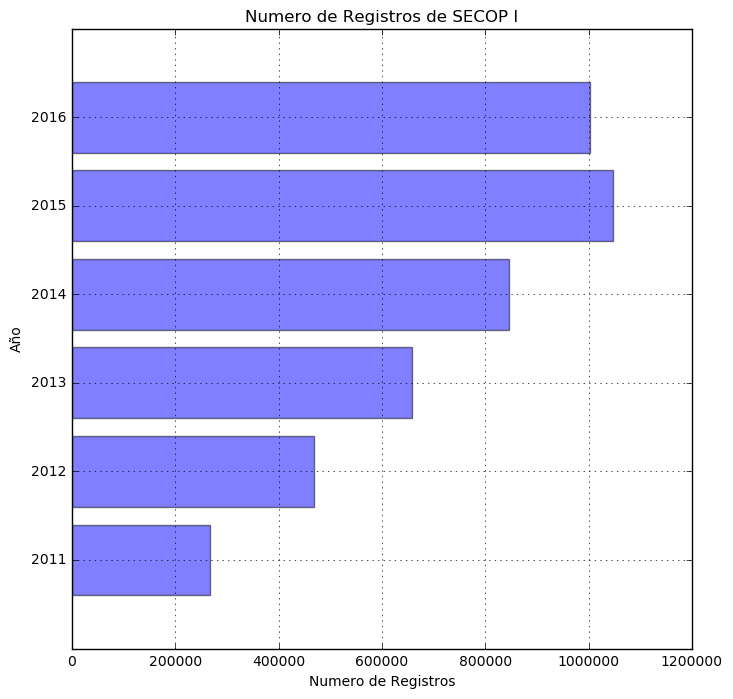

In [69]:
fig = plt.figure(figsize = (8,8))
plt.barh( years,n_rows, align='center',alpha=0.5)
plt.yticks(years,objects)
plt.ylabel('Año')
plt.xlabel('Numero de Registros')
plt.title('Numero de Registros de SECOP I')
plt.grid()
plt.show()

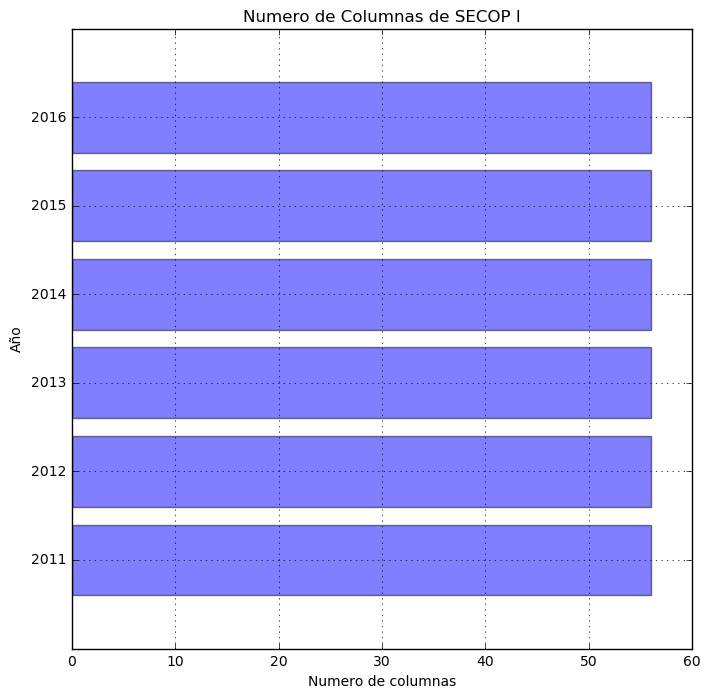

In [70]:
fig = plt.figure(figsize = (8,8))
plt.barh( years,n_columns, align='center',alpha=0.5)
plt.yticks(years,objects)
plt.ylabel('Año')
plt.xlabel('Numero de columnas')
plt.title('Numero de Columnas de SECOP I')
plt.grid()
plt.show()

In [100]:
for line in  (dtypes_2011):
    print (line.strip('\n'))

 Nivel Entidad                                      object
Orden Entidad                                      object
Nombre de la Entidad                               object
NIT de la Entidad                                  object
ID Tipo de Proceso                                  int64
Tipo de Proceso                                    object
Estado del Proceso                                 object
Causal de Otras Formas de Contratacion Directa     object
ID Regimen de Contratacion                          int64
Regimen de Contratacion                            object
ID Objeto a Contratar                               int64
Objeto a Contratar                                 object
Detalle del Objeto a Contratar                     object
Tipo de Contrato                                   object
Municipio Obtencion                                object
Municipio Entrega                                  object
Municipios Ejecucion                               object
Fecha de Carg

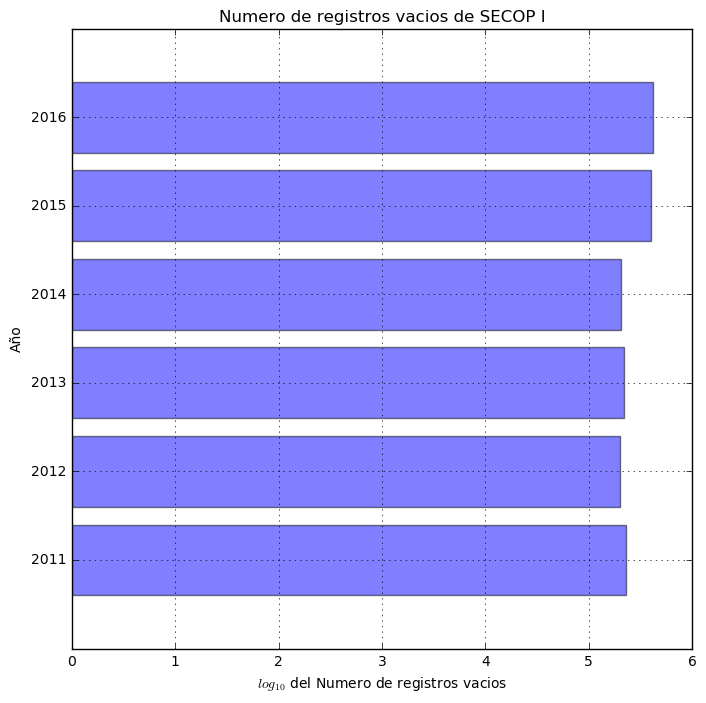

In [71]:
fig = plt.figure(figsize = (8,8))
plt.barh( years,np.log10(n_nulls), align='center',alpha=0.5)
plt.yticks(years,objects)
plt.ylabel('Año')
plt.xlabel('$log_{10}$ del Numero de registros vacios')
plt.title('Numero de registros vacios de SECOP I')
plt.grid()
plt.show()

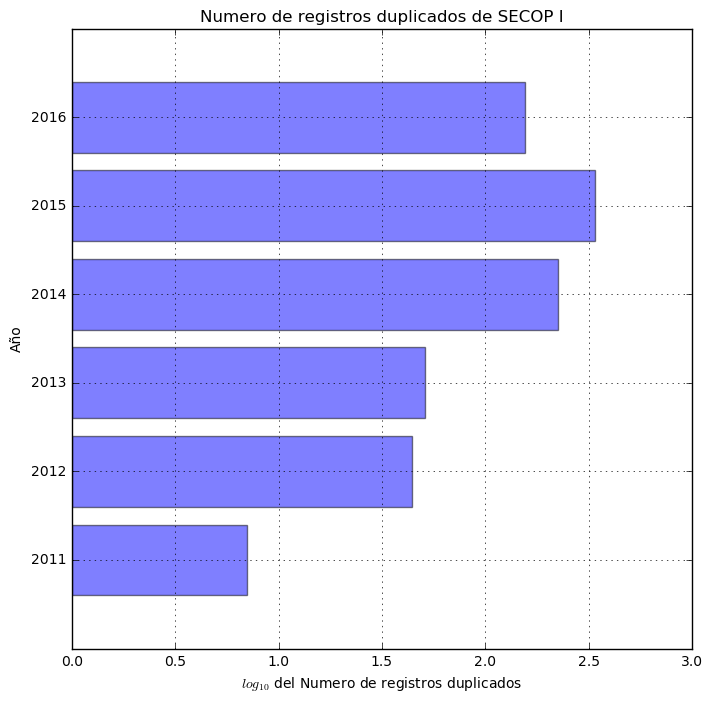

In [72]:
fig = plt.figure(figsize = (8,8))
plt.barh( years,np.log10(n_duplicates), align='center',alpha=0.5)
plt.yticks(years,objects)
plt.ylabel('Año')
plt.xlabel('$log_{10}$ del Numero de registros duplicados')
plt.title('Numero de registros duplicados de SECOP I')
plt.grid()
plt.show()

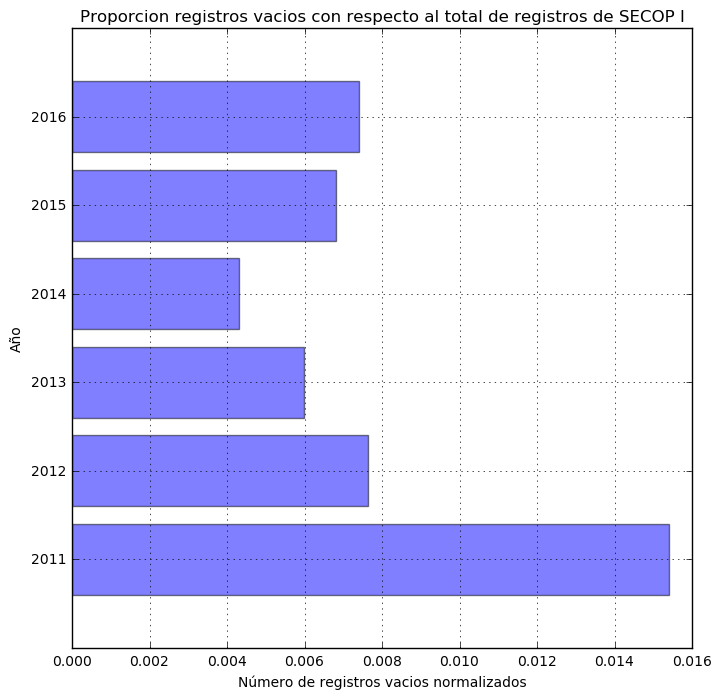

In [73]:
fig = plt.figure(figsize = (8,8))
plt.barh( years,(n_nulls/(n_rows*n_columns)), align='center',alpha=0.5)
plt.yticks(years,objects)
plt.ylabel('Año')
plt.xlabel('Número de registros vacios normalizados')
plt.title('Proporcion registros vacios con respecto al total de registros de SECOP I')
plt.grid()
plt.show()

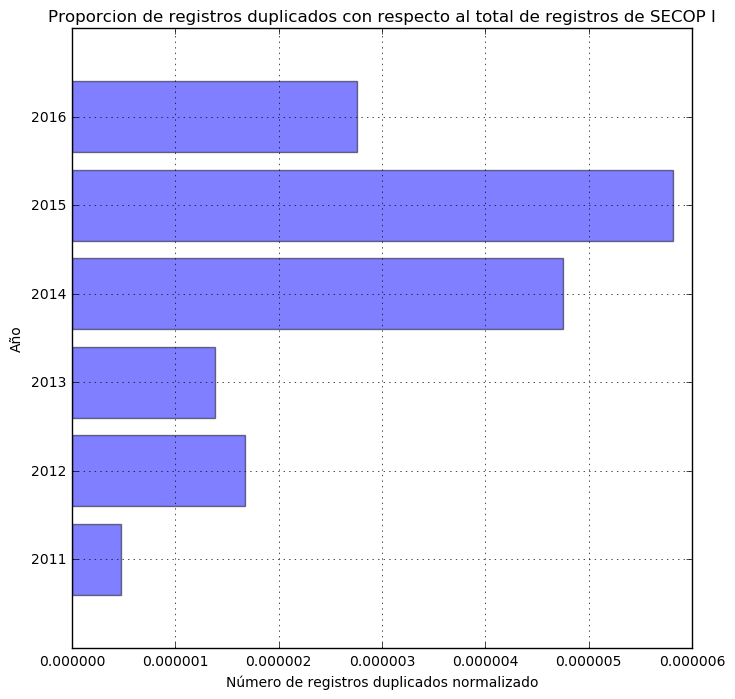

In [74]:
fig = plt.figure(figsize = (8,8))
plt.barh( years,(n_duplicates/(n_rows*n_columns)), align='center',alpha=0.5)
plt.yticks(years,objects)
plt.ylabel('Año')
plt.xlabel('Número de registros duplicados normalizado')
plt.title('Proporcion de registros duplicados con respecto al total de registros de SECOP I')
plt.grid()
plt.show()

In [124]:
string_array = []
string_array.append("Nombre Columna                                    2011    2012    2013    2014    2015    2016")
for i in range(len(nulls_column_2011)-1):
    line_2011 = nulls_column_2011[i].strip('\n')
    line_2012 = nulls_column_2012[i].strip('\n')
    line_2013 = nulls_column_2013[i].strip('\n')
    line_2014 = nulls_column_2014[i].strip('\n')
    line_2015 = nulls_column_2015[i].strip('\n')
    line_2016 = nulls_column_2016[i].strip('\n')
    line_2012= (re.findall(r'\d+', line_2012))[0]
    line_2013= (re.findall(r'\d+', line_2013))[0]
    line_2014= (re.findall(r'\d+', line_2014))[0]
    line_2015= (re.findall(r'\d+', line_2015))[0]
    line_2016= (re.findall(r'\d+', line_2016))[0]
    string_array.append(line_2011 + "    "+line_2012 + "    "+line_2013 + "    "+line_2014 + "    "+line_2015 + "    "+line_2016)

In [125]:
for line_i in (string_array):
    print (line_i)

Nombre Columna                                    2011    2012    2013    2014    2015    2016
 Nivel Entidad                                         0    0    0    0    0    0
Orden Entidad                                         0    0    0    0    0    0
Nombre de la Entidad                                  0    0    0    0    0    0
NIT de la Entidad                                     0    0    0    0    0    0
ID Tipo de Proceso                                    0    0    0    0    0    0
Tipo de Proceso                                       0    0    0    0    0    0
Estado del Proceso                                    0    0    0    0    0    0
Causal de Otras Formas de Contratacion Directa        0    0    0    0    0    0
ID Regimen de Contratacion                            0    0    0    0    7    6
Regimen de Contratacion                               0    0    0    0    7    6
ID Objeto a Contratar                                 0    0    0    0    0    0
Objeto a Cont